# Quantized

[Documentation Home](https://quantized.readthedocs.io)

Quantized is a flexible python library for solving quantum 
mechanical systems in one dimension. It's suitable for
experimenting on toy systems and could be used to make
educational material for a quantum mechanics course. 


At it's core, Quantized is a library for solving the time dependent schroedinger equation. It does this using a basis set expansion:

In [1]:
from quantized.basis import HarmonicOscillator, EigenBasis
basis_set = (
    [HarmonicOscillator(n, center=1.0) for n in range(5)]
    + [HarmonicOscillator(n, center=-1.0) for n in range(5)]
)
basis_set

[HarmonicOscillator(n=0, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=1, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=2, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=3, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=4, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=0, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=1, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=2, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=3, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=4, center=-1.0, mass=1.0, omega=1.0)]

We provide the basic quantum mechanical operators out of the box. You can solve for the eigenstates
of an arbitrary potential function:

In [2]:
from functools import partial
from quantized import operators

def potential(x, a, b):
    return a * x ** 4 - b * x**2


v = partial(potential, a=0.5, b=1.5)

H = operators.Hamiltonian(v).matrix(basis_set)
S = operators.Overlap().matrix(basis_set)

eig_basis = EigenBasis.from_basis(basis_set, H, S)

print("Ground state", eig_basis.states[0])
print("\nEnergies:", eig_basis.energies)

Ground state -1.0347 * HarmonicOscillator(n=0, center=1.0, mass=1.0, omega=1.0)
 + -0.1843 * HarmonicOscillator(n=1, center=1.0, mass=1.0, omega=1.0)
 + 0.6542 * HarmonicOscillator(n=2, center=1.0, mass=1.0, omega=1.0)
 + -0.3530 * HarmonicOscillator(n=3, center=1.0, mass=1.0, omega=1.0)
 + 0.0665 * HarmonicOscillator(n=4, center=1.0, mass=1.0, omega=1.0)
 + -1.0347 * HarmonicOscillator(n=0, center=-1.0, mass=1.0, omega=1.0)
 + 0.1843 * HarmonicOscillator(n=1, center=-1.0, mass=1.0, omega=1.0)
 + 0.6542 * HarmonicOscillator(n=2, center=-1.0, mass=1.0, omega=1.0)
 + 0.3530 * HarmonicOscillator(n=3, center=-1.0, mass=1.0, omega=1.0)
 + 0.0665 * HarmonicOscillator(n=4, center=-1.0, mass=1.0, omega=1.0)

Energies: (-0.29250209926016485, 0.19345031211571542, 1.7483438634719877, 3.3474326821976024, 5.7821078252726785, 9.102182707751163, 21.525312217595072, 30.679062645876364, 76.58431450478272, 96.84817066757972)


The library is designed with the scientist in mind. The eigen states
are simply functions of `x`. No fussing about with messy and error-prone conversion.

In [3]:
from matplotlib.pyplot import subplots
import numpy as np

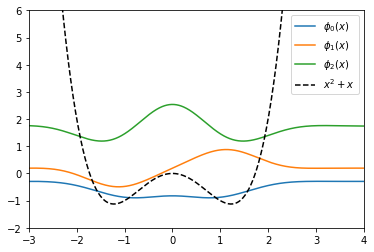

In [4]:
fig, ax = subplots()
x = np.linspace(-5, 5, 1000)

for i, (b, e) in enumerate(zip(eig_basis.states[:3], eig_basis.energies[:3])):
    ax.plot(x, b(x) + e, label=f"$\phi_{i}(x)$")

ax.plot(x, v(x), "k--", label="$x^2 + x$")
ax.legend(loc="upper right")
ax.set_xlim(-3, 4)
_ = ax.set_ylim(-2, 6)

And we've done the same for time dependent solutions as well. Pick 
an initial state (any function), and you can propogate through time. 

In [5]:
%%capture

from quantized.time_evolution import TimeEvolvingState
from quantized.plotting import animate_state

initial = HarmonicOscillator(n=0, center=-1)
time_state = TimeEvolvingState(initial, eig_basis)

fig, ax = subplots()
ax.set_xlim(-3, 4)
ax.set_ylim(-2, 6)
anim = animate_state(fig, ax, initial_state=initial, time_dependent_state=time_state, potential=v, nframes=200, interval=20)

In [6]:
from IPython.display import HTML
HTML(anim.to_html5_video())



The original inspiration for the library came during
the course of research on finding the probablilistic confidence of the time it takes for a quantum
particle to move from one place to another. Based on 
[this paper](https://www.worldscientific.com/doi/10.1142/S0219633618500463).

## Features

- Harmonic Oscillator Basis Functions
- Functional API for Solving the Time Independent/Time Dependent Schroedinger Equation
- Molecular manipulations: translation, rotation, etc
- Guaranteed 80%+ test coverage
- CLI for 1d transit time analysis
- Caching and optimizations for overlap and hamiltonian integrals
- Mostly Type hinted (work in progress)
- Logging and input validation, with helpful error messages


## License
[License](LICENSE.md)
